### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---




#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**: Hyeonjae Kim

**Student ID**: 20543852

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [ ]:
# Make sure scikit-learn is version >= 1.3.0
# !pip uninstall scikit-learn -y
# !pip install -U scikit-learn

In [1]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd

In [2]:
#Loading the Dataset
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.head(10) # Print Top 10 Rows of the dataset for preview

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

In [3]:
#Information on features
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]



---



> Q0. Generate Y - Predictor Value

In [4]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response

data['Y'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

to_drop = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
data = data.drop(to_drop, axis=1)

#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




> Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

In [5]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

# Q1a. Showcase existence of missing value, outliers & imbalances within dataset

# Part 1 - Show there are missing values in Income feature (using table)
data.isna().any().to_frame().T

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
0  False       False      False           False    True    False     False   

   Dt_Customer  Recency  MntWines  ...  MntGoldProds  NumDealsPurchases  \
0        False    False     False  ...         False              False   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0            False                False              False              False   

   Complain  Z_CostContact  Z_Revenue      Y  
0     False          False      False  False  

[1 rows x 24 columns]

<Axes: >

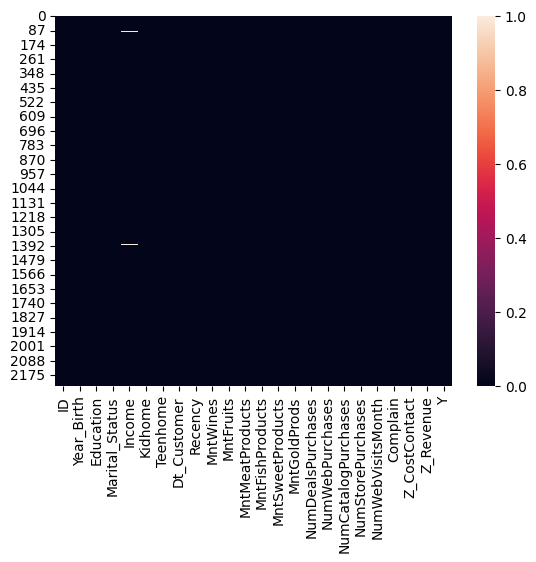

In [6]:
import seaborn as sns

# Part 1- Show there are missing values in Income feature (using plot)
sns.heatmap(data.isnull())

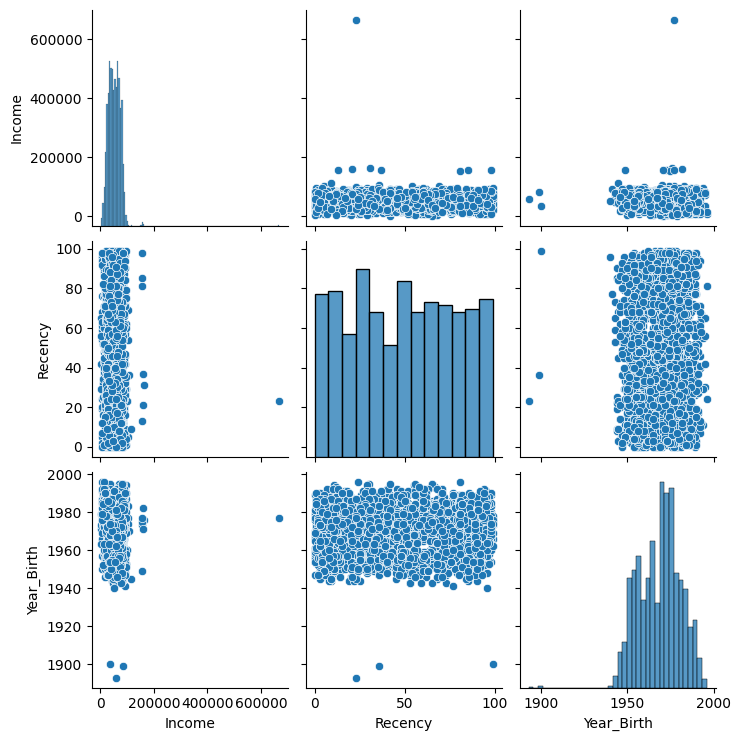

In [7]:
plotted_cols = [ "Income", "Recency", "Year_Birth"]

# Part 2 - Show there are outliers & imbalances in dataset
sns.pairplot(data.dropna()[plotted_cols])

>  Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.

In [8]:
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT

# (i) handle missing values
data = data.dropna()

In [9]:
# (ii) handle outliers (capping on Year_Birth & Income)
data = data[(data['Year_Birth'] > 1940)]
data = data[(data['Income'] < 600000)]

> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | Capping min and max | It can reduce the noise in the data |
|Handling Missing Values| Dropping Missing Values | It does not make any assumptions about the missing data |


>  Q1d. Plot 3 or more types of charts over all columns of data

<ipython-input-10-db45ac80b26f>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

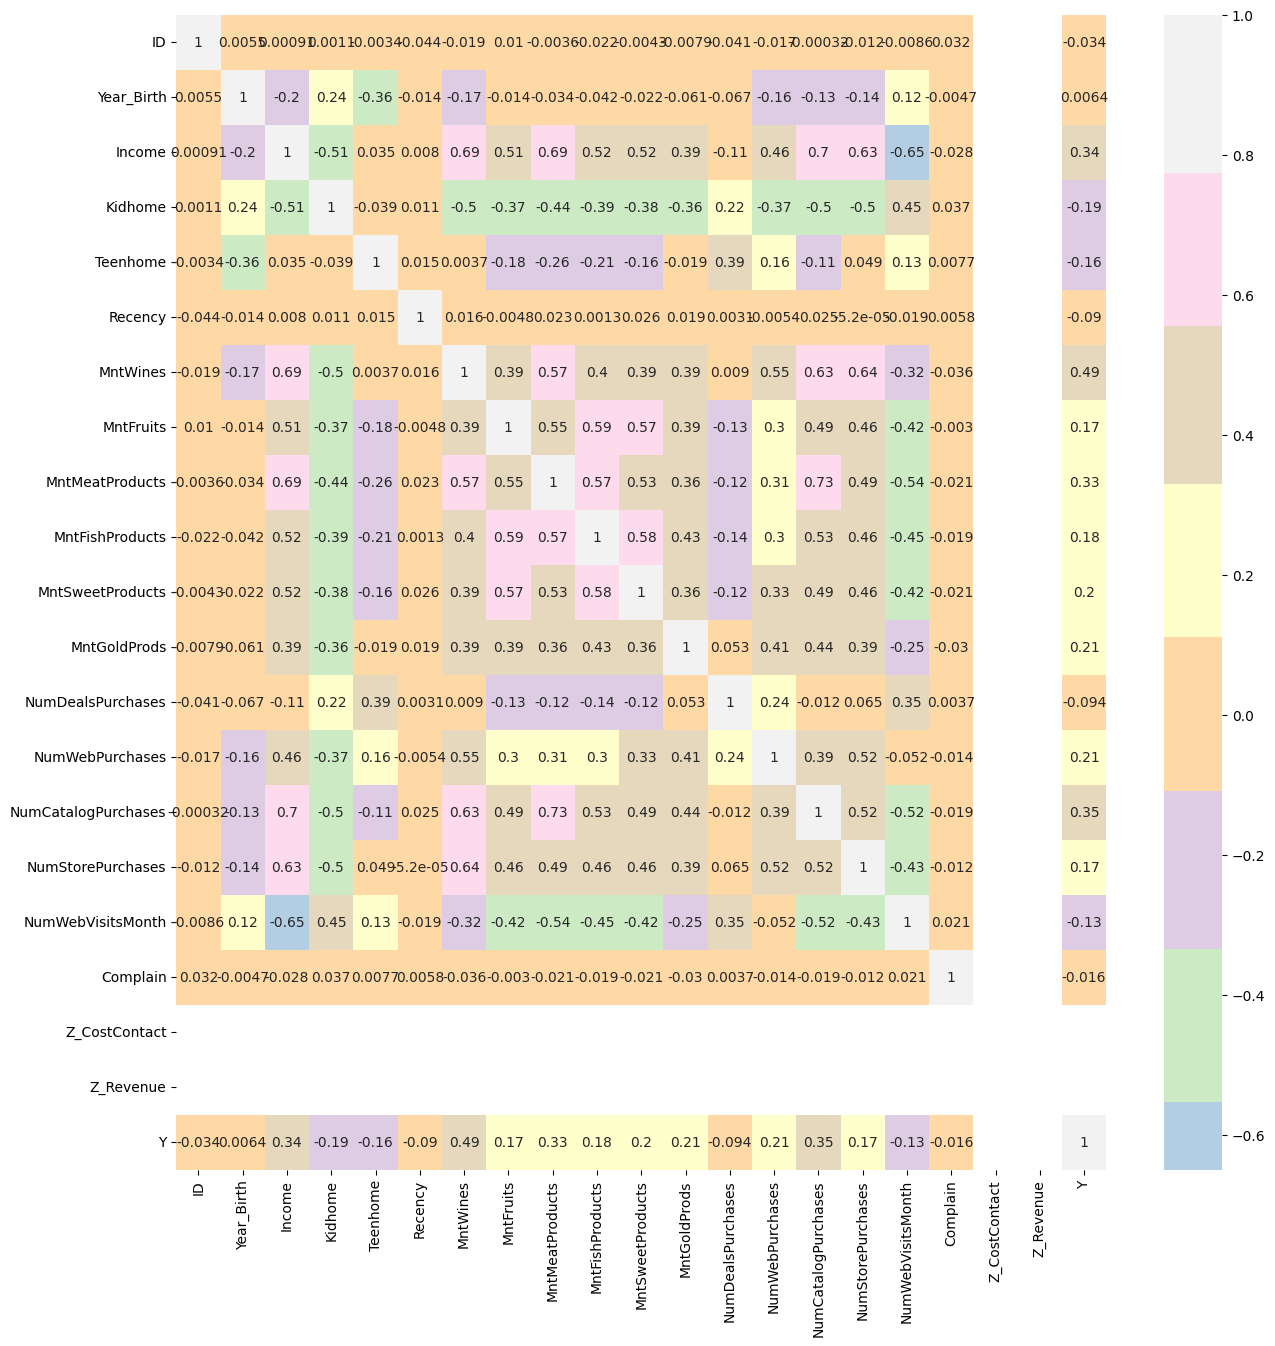

In [10]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting

# import xxx as xxx (Import Graphing Libraries)
# ....
# plt.show()
import matplotlib.pyplot as plt

corr_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, center=0, cmap="Pastel1")

<Axes: >

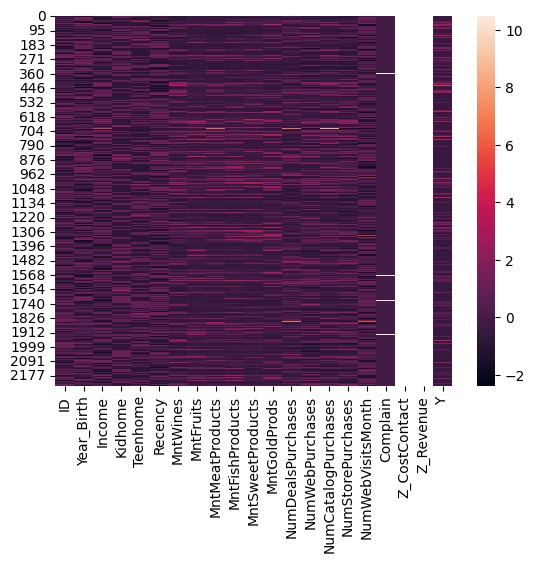

In [11]:
data_numeric = data.select_dtypes(exclude='object')
sns.heatmap((data_numeric-data_numeric.mean())/data_numeric.std())

<Figure size 2000x2000 with 0 Axes>

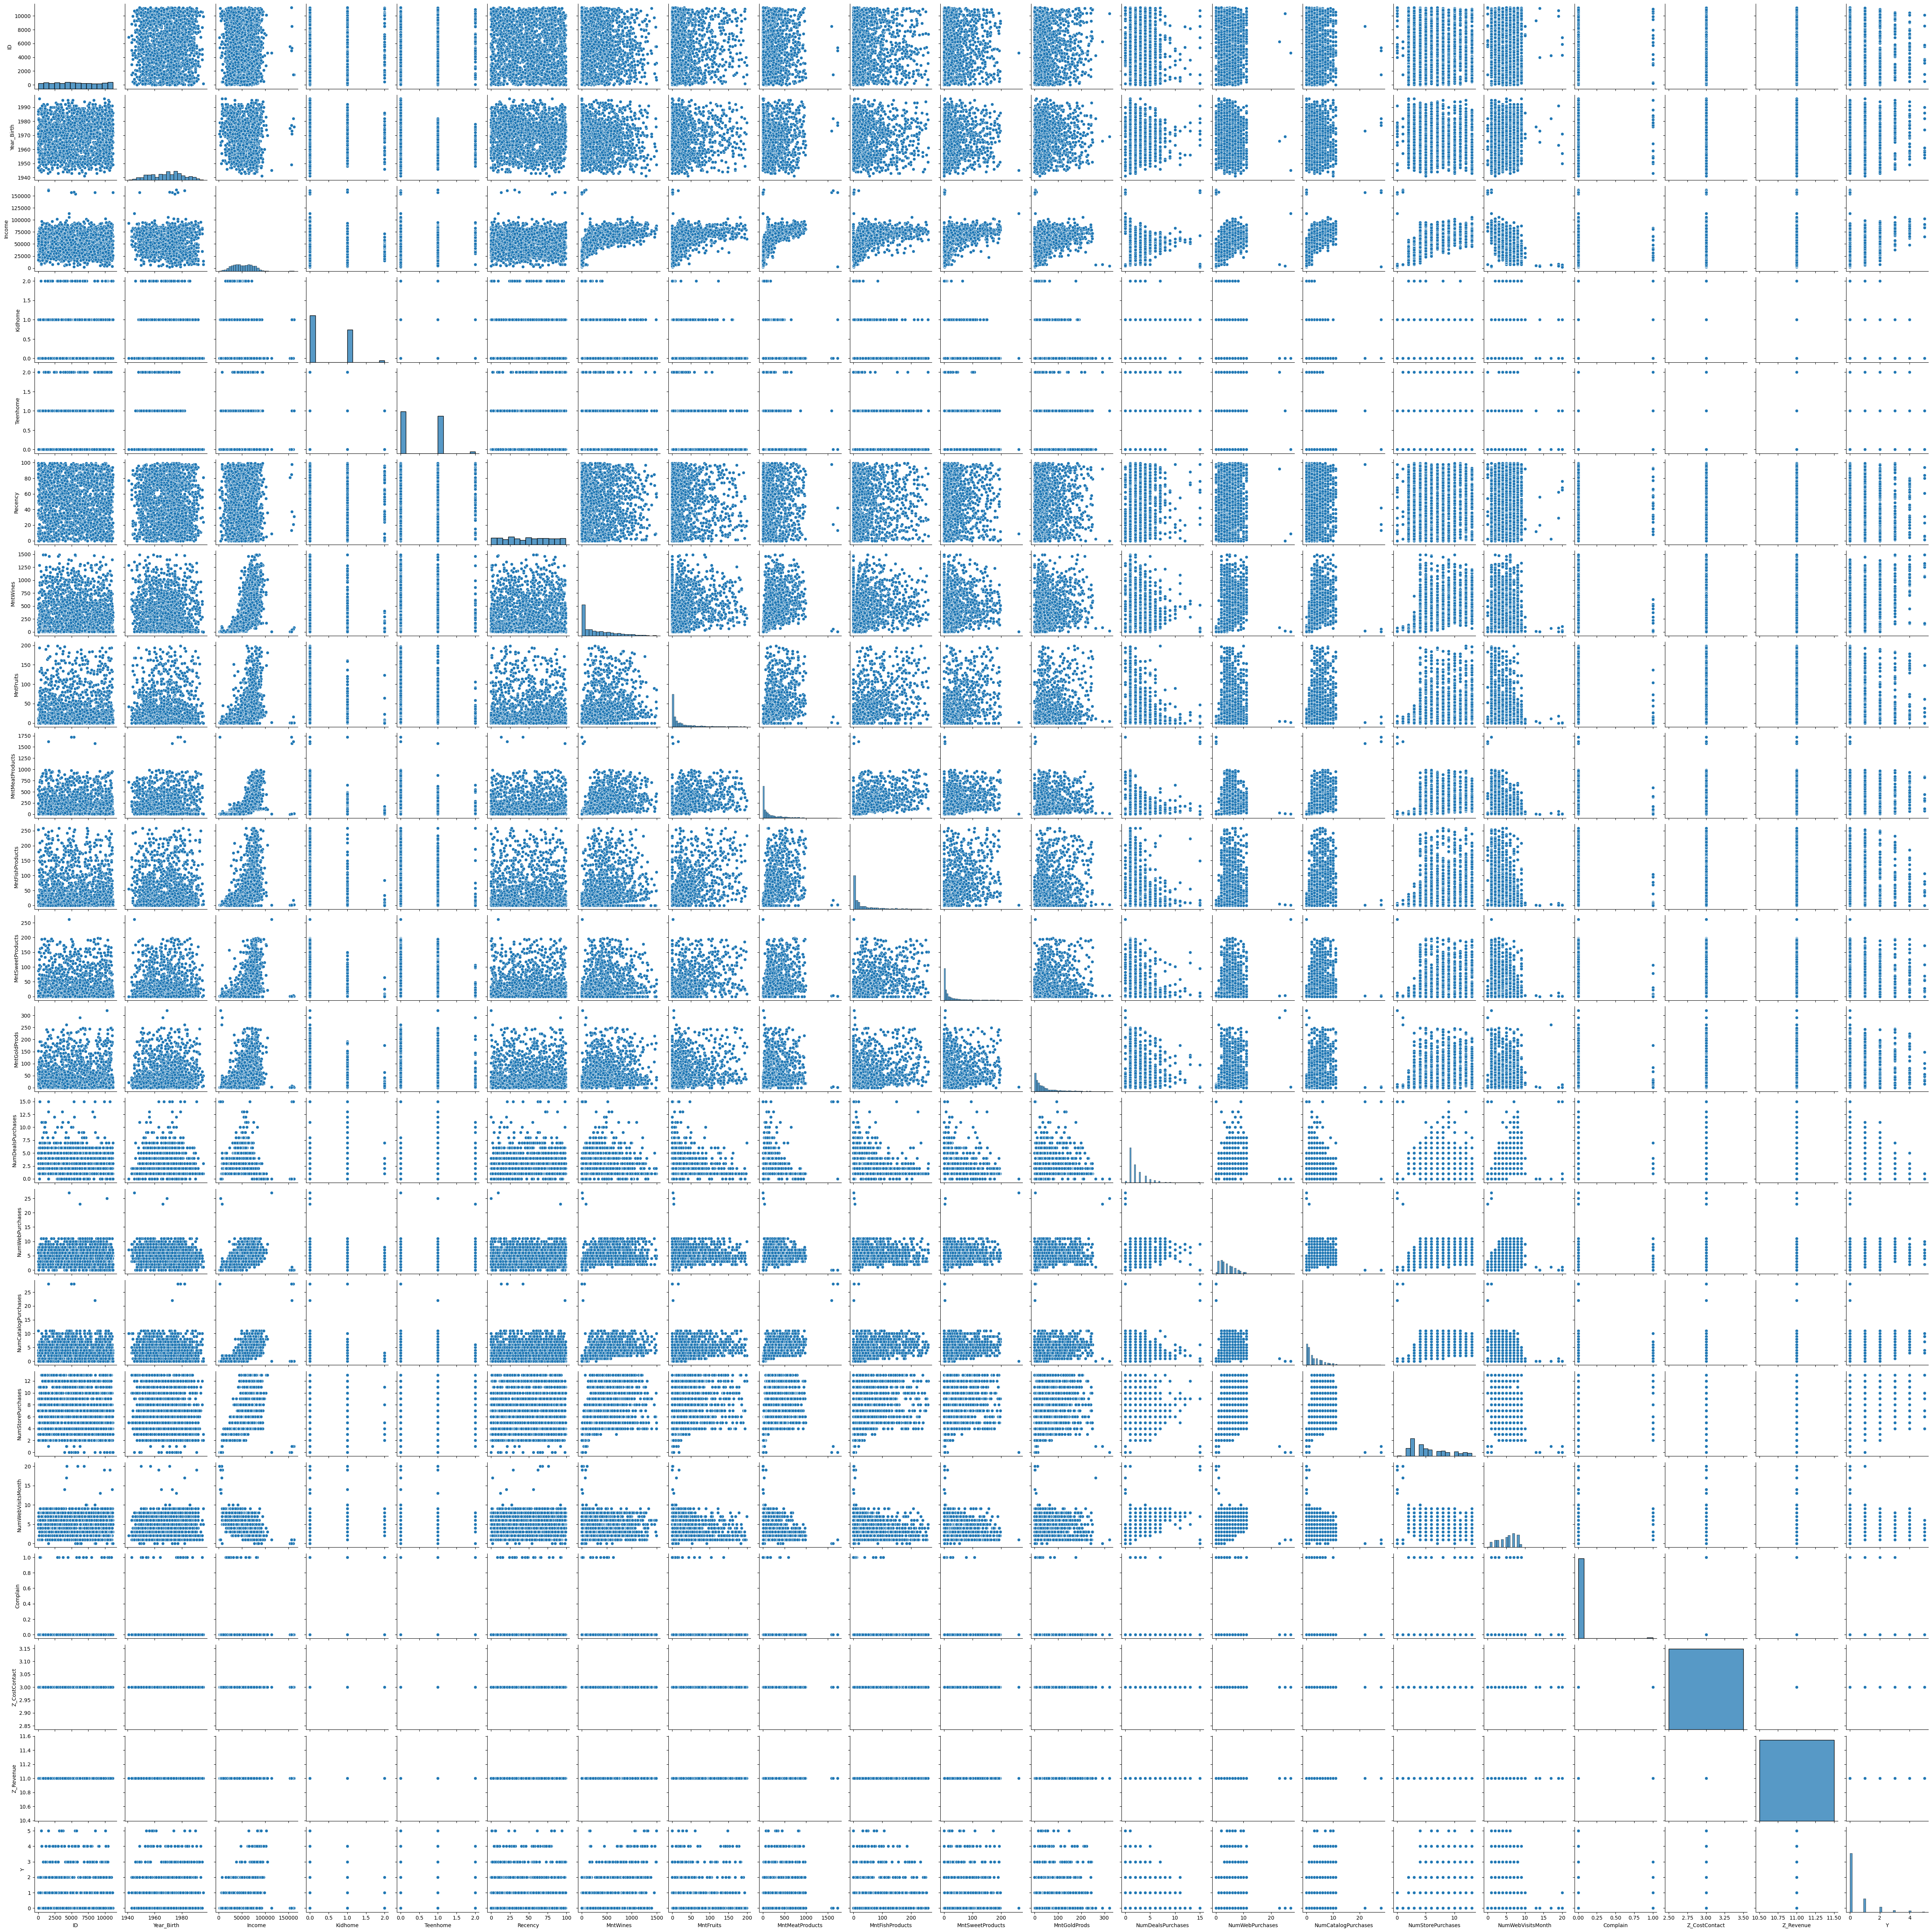

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data_numeric)

> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | quite significant negative correlation between income and number of web visits | wealthy people quite tend to make purchases in online stores |
| Pattern 2 | quite significant positive correlation between income and number of catalog purchases / store visits | wealthy people quite tend to make purchases in offline stores |
| Pattern 3 | quite significant positive correlation between amount of meat purchase and amount of wine purchases / store visits | wine go along with meat quite well |




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | Ordinal | none |
Year_Birth         | Discrete | none |      
Education          | Ordinal | Use Label Encoding |       
Marital_Status     | Nominal | Use One Hot Encoding |
Income             | Continuous | Normalization |      
Kidhome            | Discrete | Normalization |        
Teenhome           | Discrete | Normalization |   
Dt_Customer        | Discrete | Normalization |      
Recency            | Discrete | Normalization |     
MntWines           | Discrete | Normalization |    
MntFruits          | Discrete | Normalization |    
MntMeatProducts    | Discrete | Normalization |     
MntFishProducts    | Discrete | Normalization |    
MntSweetProducts   | Discrete | Normalization |    
MntGoldProds       | Discrete | Normalization |
NumDealsPurchases  | Discrete | Normalization |  
NumWebPurchases    | Discrete | Normalization |
NumCatalogPurchases| Discrete | Normalization |
NumStorePurchases  | Discrete | Normalization |  
NumWebVisitsMonth  | Discrete | Normalization |  
AcceptedCmp3       | Nominal | Drop as this is y (predicted) value |  
AcceptedCmp4       | Nominal | Drop as this is y (predicted) value |       
AcceptedCmp5       | Nominal | Drop as this is y (predicted) value |       
AcceptedCmp1       | Nominal | Drop as this is y (predicted) value |       
AcceptedCmp2       | Nominal | Drop as this is y (predicted) value |       
Complain           | Nominal | Normalization |       
Z_CostContact      | Discrete | Normalization |     
Z_Revenue          | Discrete | Normalization |          
Response           | Nominal | Drop as this is y (predicted) value |


>  Q2b. Perform the aforementioned Data Preprocessings

In [12]:
#@title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing

# import xxx as xxx (Import panda Libraries)
# from sklearn.preprocessing import xxx (Import sklearn libraries)
# ....
#

In [11]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

<ipython-input-11-e229d5a7a057>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


In [12]:
from sklearn.preprocessing import LabelEncoder

cat_encoder = LabelEncoder()
for i in ['Education']:
    data[i]=data[[i]].apply(cat_encoder.fit_transform)

In [13]:
from sklearn.preprocessing import StandardScaler

scaled_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

data[scaled_cols] = StandardScaler().fit_transform(data[scaled_cols])
print(data)

         ID  Year_Birth  Education Marital_Status    Income   Kidhome  \
0      5524   -1.020650          2         Single  0.287023 -0.823066   
1      2174   -1.277380          2         Single -0.260840  1.039573   
2      4141   -0.336037          2       Together  0.912973 -0.823066   
3      6182    1.289921          2       Together -1.175866  1.039573   
4      5324    1.033191          4        Married  0.294223  1.039573   
...     ...         ...        ...            ...       ...       ...   
2235  10870   -0.164883          2        Married  0.430329 -0.823066   
2236   4001   -1.961994          4       Together  0.559979  2.902212   
2237   7270    1.033191          2       Divorced  0.233277 -0.823066   
2238   8235   -1.106227          3       Together  0.802973 -0.823066   
2239   9405   -1.277380          4        Married  0.042264  1.039573   

      Teenhome Dt_Customer   Recency  MntWines  ...  MntGoldProds  \
0    -0.930091  2012-04-09  0.311203  0.977273  ...   

In [14]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
temp = pd.DataFrame(one_hot_encoder.fit_transform(data[['Marital_Status']]))
temp.columns = one_hot_encoder.get_feature_names_out()

temp.index = data.index

data_without_marital_status = data.drop(['Marital_Status'], axis=1)
temp = pd.concat([data_without_marital_status, temp], axis=1)
temp.columns = temp.columns.astype(str)

temp.to_csv('temp.csv')

In [15]:
data = temp



---



#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.

>  Q3a. Generate Test/Training Data Split

In [16]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split

from sklearn.model_selection import train_test_split # Import Train Test Split From Libraries

X = data.drop(["Y", "Dt_Customer"], axis=1)
y = data["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

> Q3b. Choose and deploy dataset to 3+ ML Model

In [55]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

names = [
    "Bernoulli\nNB",
    "Decision\nTree",
    "Random\nForest",
    "Neural\nNet",
    "Ada\nBoost",
    "Naive\nBayes",
]

classifiers = [
    BernoulliNB(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
]


In [56]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# Step 1. Import Model (already done in the previous cell)



In [57]:
X_test

ID  Year_Birth  Education    Income   Kidhome  Teenhome   Recency  \
664    8162   -1.106227          3 -1.732601 -0.823066 -0.930091  1.348337   
826    9499   -1.277380          2  1.925224  1.039573  2.745388  1.659477   
1567   4390   -1.277380          2  1.084941 -0.823066  0.907649 -1.209927   
415    7106   -2.218724          4  1.110490 -0.823066 -0.930091  0.829770   
1544   5589   -0.421613          2  0.001106 -0.823066  0.907649  1.590335   
...     ...         ...        ...       ...       ...       ...       ...   
1405  10827   -0.164883          4 -0.697356  1.039573  0.907649  0.000063   
1425   2428    0.091847          2 -1.105350  1.039573 -0.930091 -0.898787   
1079   3081    0.776460          4 -0.508433  1.039573 -0.930091  0.553201   
1753   5092   -1.705264          4 -0.018125 -0.823066  0.907649 -0.345649   
2116     87    1.033191          0 -1.125372  1.039573 -0.930091 -1.140785   

      MntWines  MntFruits  MntMeatProducts  ...  Z_CostContact  Z_Revenue  \
664  -0.893435  -0.637680        -0.696174  ...            0.0        0.0   
826   2.886521  -0.285391         0.534712  ...            0.0        0.0   
1567  0.455491  -0.285391         0.017383  ...            0.0        0.0   
415   0.526643  -0.662844         1.890471  ...            0.0        0.0   
1544  0.965414  -0.662844        -0.232362  ...            0.0        0.0   
...        ...        ...              ...  ...            ...        ...   
1405 -0.644402  -0.587353        -0.651577  ...            0.0        0.0   
1425 -0.896399  -0.209901        -0.629278  ...            0.0        0.0   
1079 -0.884541  -0.612517        -0.718473  ...            0.0        0.0   
1753  0.221282  -0.662844        -0.535624  ...            0.0        0.0   
2116 -0.905294  -0.486699        -0.722933  ...            0.0        0.0   

      Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
664                     0.0                   0.0                      0.0   
826                     0.0                   0.0                      0.0   
1567                    0.0                   0.0                      0.0   
415                     0.0                   0.0                      0.0   
1544                    0.0                   0.0                      1.0   
...                     ...                   ...                      ...   
1405                    0.0                   0.0                      0.0   
1425                    0.0                   0.0                      0.0   
1079                    0.0                   0.0                      0.0   
1753                    0.0                   0.0                      0.0   
2116                    0.0                   0.0                      0.0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
664                      0.0                    0.0                      1.0   
826                      1.0                    0.0                      0.0   
1567                     0.0                    0.0                      1.0   
415                      1.0                    0.0                      0.0   
1544                     0.0                    0.0                      0.0   
...                      ...                    ...                      ...   
1405                     1.0                    0.0                      0.0   
1425                     1.0                    0.0                      0.0   
1079                     1.0                    0.0                      0.0   
1753                     0.0                    0.0                      0.0   
2116                     1.0                    0.0                      0.0   

      Marital_Status_Widow  Marital_Status_YOLO  
664                    0.0                  0.0  
826                    0.0                  0.0  
1567                   0.0                  0.0  
415                    0.0                  0.0  

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

predictions = []
for idx, classifier in enumerate(classifiers):
  # Step 2. Fit Dataframe into Model
  classifier.fit(X_train, y_train)
  # Step 3. Generate Model Prediction (Y)
  classifier.predict(X_test)

  predictions.append(classifier.predict(X_test))




---



#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve

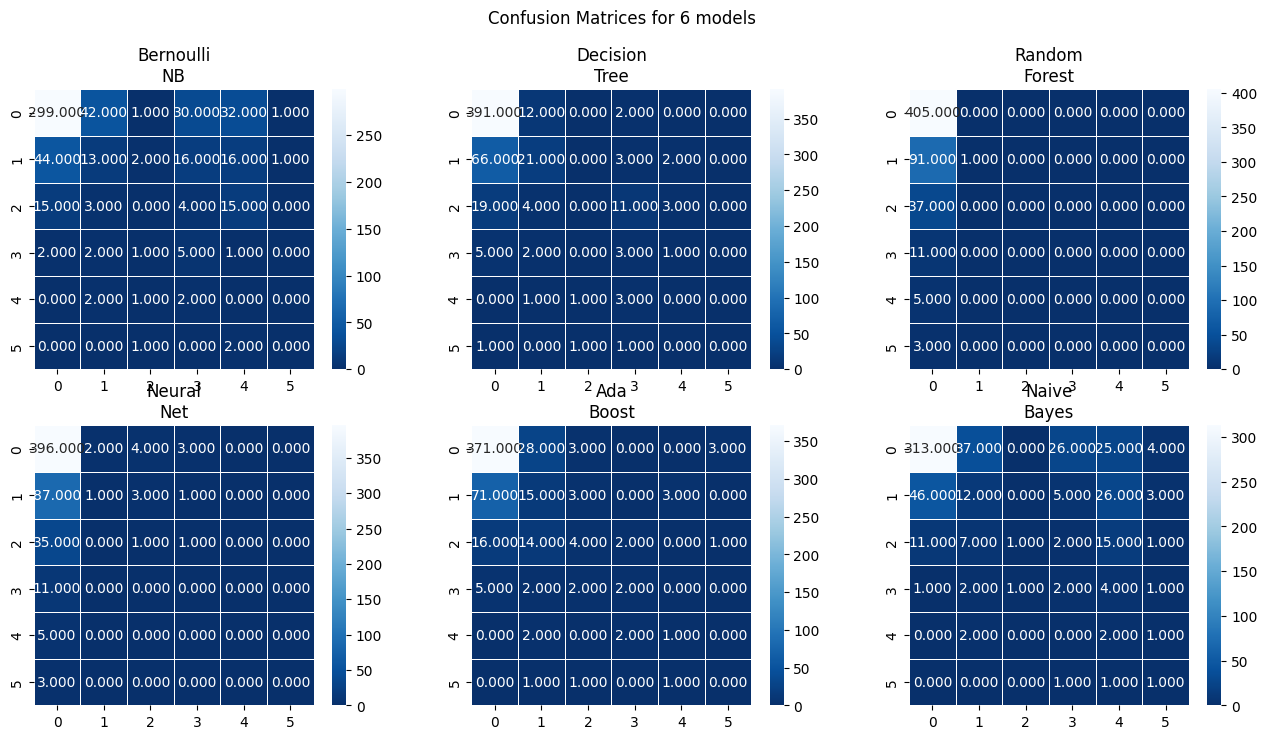

In [60]:
#Q4a - 1. Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(16,8))
fig.suptitle('Confusion Matrices for 6 models')

for idx, classifier in enumerate(classifiers):
  # score = round(classifiers[idx].score(X_test,y_test), 4)
  cm = confusion_matrix(y_test, predictions[idx])
  sns.heatmap(cm,
              ax=axes[idx // 3, idx % 3],
              annot=True,
              fmt=".3f",
              linewidths=.5,
              square = True,
              cmap = 'Blues_r',
  );
  axes[idx // 3, idx % 3].set_title(names[idx])
# plt.figure(figsize=(4,4))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title(all_sample_title, size = 15);

In [61]:
#Q4a - 2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
recalls = []
precisions = []
f1s = []
accuracies = []

summary = []
for idx, classifier in enumerate(classifiers):
  print(f'----------Test Result of {names[idx]}----------')
  print("recall score", recall_score(y_test, predictions[idx], average="weighted"))
  recalls.append(recall_score(y_test, predictions[idx], average="weighted"))
  summary.append([names[idx], 'recall', recall_score(y_test, predictions[idx], average="weighted")])
  summary.append([names[idx], 'f1', f1_score(y_test, predictions[idx], average="weighted")])
  summary.append([names[idx], 'accuracy', accuracy_score(y_test, predictions[idx])])
  summary.append([names[idx], 'precision', precision_score(y_test, predictions[idx], average="weighted")])

  print("precision score", precision_score(y_test, predictions[idx], average="weighted"))
  precisions.append(precision_score(y_test, predictions[idx], average="weighted"))
  print("f1 score", f1_score(y_test, predictions[idx], average="weighted"))
  f1s.append(f1_score(y_test, predictions[idx], average="weighted"))
  print("accuracy score", accuracy_score(y_test, predictions[idx]))
  accuracies.append(accuracy_score(y_test, predictions[idx]))
  # summary.append([names[idx],
  #                recall_score(y_test, predictions[idx], average="weighted"),
  #                precision_score(y_test, predictions[idx], average="weighted"),
  #                f1_score(y_test, predictions[idx], average="weighted"),
  #                accuracy_score(y_test, predictions[idx])
  #                ])


----------Test Result of Bernoulli
NB----------
recall score 0.5732368896925859
precision score 0.6449009671995424
f1 score 0.6035051534998349
accuracy score 0.5732368896925859
----------Test Result of Decision
Tree----------
recall score 0.7504520795660036
precision score 0.6840363960344229
f1 score 0.7021182656868467
accuracy score 0.7504520795660036
----------Test Result of Random
Forest----------
recall score 0.7341772151898734
precision score 0.7037011557512384
f1 score 0.6234511089976374
accuracy score 0.7341772151898734
----------Test Result of Neural
Net----------
recall score 0.7197106690777577
precision score 0.6038894838042707
f1 score 0.6222257516995209
accuracy score 0.7197106690777577
----------Test Result of Ada
Boost----------
recall score 0.7106690777576854
precision score 0.6561196827854793
f1 score 0.67566001923246
accuracy score 0.7106690777576854
----------Test Result of Naive
Bayes----------
recall score 0.5985533453887885
precision score 0.6864474878911512
f1 sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning

<Figure size 1600x800 with 0 Axes>

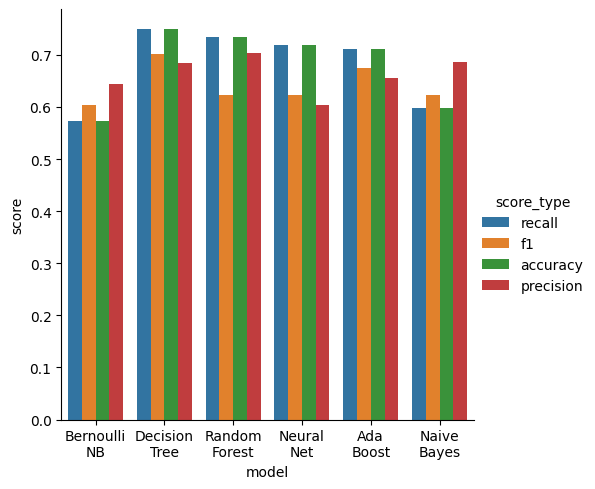

In [62]:
score_frame = pd.DataFrame(summary)
score_frame.columns=['model', 'score_type', 'score']
score_frame

plt.figure(figsize=(16, 8))
g = sns.catplot(
    data=score_frame, kind="bar",
    x="model", y="score", hue="score_type"
)

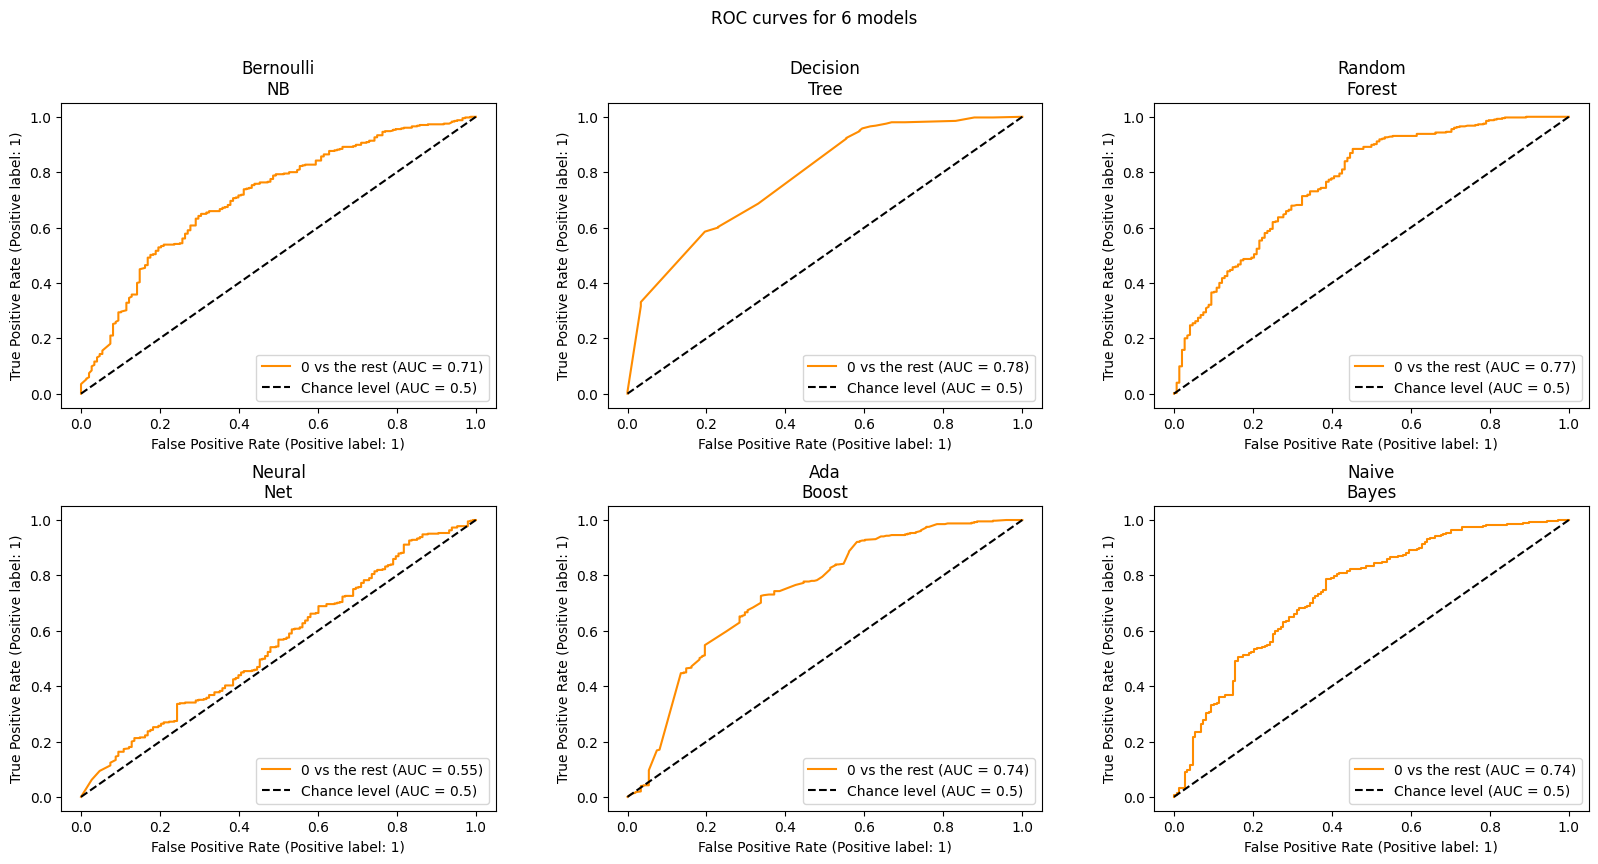

In [74]:
#Q4a - 3. Plot the ROC Curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

fig, axes = plt.subplots(2, 3, figsize=(16,8))
fig.suptitle('ROC curves for 6 models', y=1.05)
fig.tight_layout(h_pad=5, w_pad=5)

for idx, classifier in enumerate(classifiers):
  y_score = classifiers[idx].predict_proba(X_test)

  label_binalizer = LabelBinarizer().fit(y_train)
  y_onehot_test = label_binalizer.transform(y_test)
  y_onehot_test.shape

  class_of_interest=0
  class_id = np.flatnonzero(label_binalizer.classes_ == class_of_interest)[0]

  axes[idx // 3, idx % 3].set_title(names[idx])
  RocCurveDisplay.from_predictions(
      y_onehot_test[:, class_id],
      y_score[:, class_id],
      name=f"{class_of_interest} vs the rest",
      color="darkorange",
      plot_chance_level=True,
      ax=axes[idx // 3, idx % 3]
  )

> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

**Answer:**

The reason for my selection of the Decision Tree Model is that it has demonstrated better results than the other models in terms of recall, f1 score, and accuracy. Moreover, it has also proved to be superior in terms of ROC AUC score.



---



#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.



```
# 코드로 형식 지정됨
```

>  Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

In [75]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

# Step 1. Head to the library that you sourced your pre-trained models from, and look at what hyperparameters are available for tuning

# Step 2. Try and Test out various combinations to observe the minor differences hyper-parameter tuning makes

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , RandomForestClassifier())])

param_grid = [
    {'classifier' : [DecisionTreeClassifier()],
     'classifier__criterion' : ['gini', 'entropy', 'log_loss'],
    'classifier__max_depth' : [5, 10, 15, 20]
     }
    # 'classifier__solver' : ['liblinear']},
    # {'classifier' : [RandomForestClassifier()],
    # 'classifier__n_estimators' : list(range(10,101,10)),
    # 'classifier__max_features' : list(range(6,32,5))}
]

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [76]:
best_clf_preds = best_clf.predict(X_test)

In [77]:
print("recall score", recall_score(y_test, best_clf_preds, average="weighted"))
print("precision score", precision_score(y_test, best_clf_preds, average="weighted"))
print("f1 score", f1_score(y_test, best_clf_preds, average="weighted"))
print("accuracy score", accuracy_score(y_test, best_clf_preds))

recall score 0.7359855334538878
precision score 0.6566883574447948
f1 score 0.6779400719840967
accuracy score 0.7359855334538878


>  Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

In [81]:
#@title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# Step 1. Import K-fold Cross Validation Libraries
# from sklearn.model_selection import cross_val_score

# Step 2. Generate Cross-validation grid containing various combination of hyper-parameter (Tips: Check Slide 48 in Tutorial PPT)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

from sklearn.model_selection import KFold

# step 1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

pipe = Pipeline([('classifier' , RandomForestClassifier())])

# step 2: specify range of hyperparameters to tune, consider all available features
hyper_params = [
    {'classifier' : [DecisionTreeClassifier()],
     'classifier__criterion' : ['gini', 'entropy', 'log_loss'],
    'classifier__max_depth' : [2, 5, 10, 15, 20]
     }
]

# step 3: perform grid search
# 3.1 specify model

# 3.2 call GridSearchCV(), return_train_score=True ensure that train
#along with test score will be returned
model_cv = GridSearchCV(pipe, param_grid = hyper_params,
  scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 15 candidates, totalling 75 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.007072      0.001802         0.002047        0.000163   
1        0.010819      0.000275         0.002303        0.000586   
2        0.018337      0.001006         0.002167        0.000144   
3        0.020493      0.000675         0.002039        0.000175   
4        0.020967      0.001485         0.001979        0.000047   
5        0.008538      0.001518         0.002192        0.000322   
6        0.013703      0.000246         0.001906        0.000105   
7        0.021855      0.000348         0.001886        0.000100   
8        0.025402      0.001573         0.002442        0.000589   
9        0.026659      0.002478         0.002316        0.000149   
10       0.006834      0.000200         0.001826        0.000037   
11       0.014026      0.000612         0.002001        0.000067   
12       0.022217      0.000273         0.002222        0.000132   
13       0.024310      0.000542         0.002032        0.000148   
14       0.024249      0.000610         0.002144        0.000166   

                       param_classifier param_classifier__criterion  \
0   DecisionTreeClassifier(max_depth=5)                        gini   
1   DecisionTreeClassifier(max_depth=5)                        gini   
2   DecisionTreeClassifier(max_depth=5)                        gini   
3   DecisionTreeClassifier(max_depth=5)                        gini   
4   DecisionTreeClassifier(max_depth=5)                        gini   
5   DecisionTreeClassifier(max_depth=5)                     entropy   
6   DecisionTreeClassifier(max_depth=5)                     entropy   
7   DecisionTreeClassifier(max_depth=5)                     entropy   
8   DecisionTreeClassifier(max_depth=5)                     entropy   
9   DecisionTreeClassifier(max_depth=5)                     entropy   
10  DecisionTreeClassifier(max_depth=5)                    log_loss   
11  DecisionTreeClassifier(max_depth=5)                    log_loss   
12  DecisionTreeClassifier(max_depth=5)                    log_loss   
13  DecisionTreeClassifier(max_depth=5)                    log_loss   
14  DecisionTreeClassifier(max_depth=5)                    log_loss   

   param_classifier__max_depth  \
0                            2   
1                            5   
2                           10   
3                           15   
4                           20   
5                            2   
6                            5   
7                           10   
8                           15   
9                           20   
10                           2   
11                           5   
12                          10   
13                          15   
14                          20   

                                               params  split0_test_score  \
0   {'classifier': DecisionTreeClassifier(max_dept...          -0.024131   
1   {'classifier': DecisionTreeClassifier(max_dept...           0.134320   
2   {'classifier': DecisionTreeClassifier(max_dept...          -0.058913   
3   {'classifier': DecisionTreeClassifier(max_dept...          -0.174852   
4   {'classifier': DecisionTreeClassifier(max_dept...          -0.089830   
5   {'classifier': DecisionTreeClassifier(max_dept...          -0.143935   
6   {'classifier': DecisionTreeClassifier(max_dept...          -0.116882   
7   {'classifier': DecisionTreeClassifier(max_dept...          -0.105288   
8   {'classifier': DecisionTreeClassifier(max_dept...          -0.232822   
9   {'classifier': DecisionTreeClassifier(max_dept...          -0.298520   
10  {'classifier': DecisionTreeClassifier(max_dept...          -0.143935   
11  {'classifier': DecisionTreeClassifier(max_dept...          -0.113018   
12  {'classifier': DecisionTreeClassifier(max_dept...          -0.167123   
13  {'classifier': DecisionTreeClassifier(max_dept...          -0.163258   
14  {'classifier': DecisionTreeClassifier(max_dept...          -0.116882   

    split1_test_

>  Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

In [82]:
#@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# Step 1. Import Relevant functions from Libraries
# e.g. from sklearn.ensemble import BaggingClassifier

# Step 2. Add ensembling methods on top of Base models

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7179023508137432

In [83]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Accuracy score before bagging: ", dtc.score(X_test, y_test))

clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(X_train, y_train)
preds = clf.predict(X_test)
print("Accuracy score after bagging: ", clf.score(X_test, y_test))

Accuracy score before bagging:  0.6763110307414105
Accuracy score after bagging:  0.7468354430379747




---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

> Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

<Axes: title={'center': 'Feature Importances of 29 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

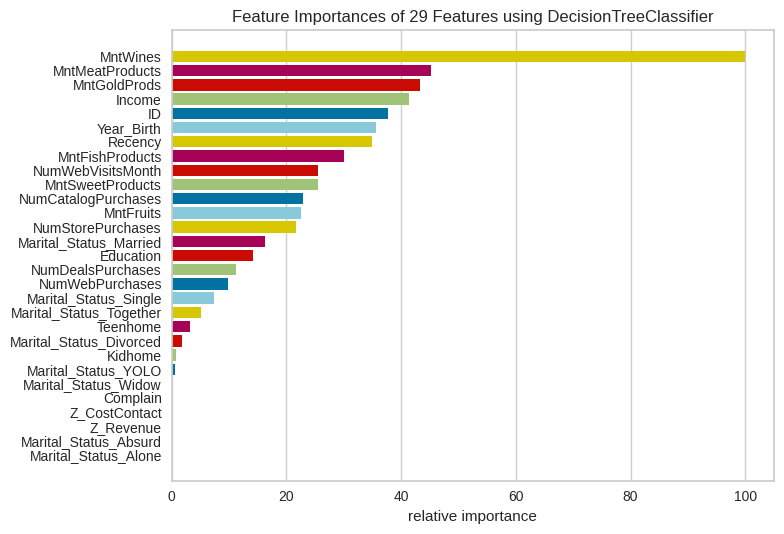

In [86]:
#@title Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

# Step 1. Import Graph Plotting Libraries (if any)
# ...
# plt.show()

# Importing FeatureImportances visualizer
from yellowbrick.model_selection import FeatureImportances

# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
# Creating the feature importances plot
visualizer = FeatureImportances(dtc, relative=True)
visualizer.fit(X_train, y_train)

# Saving plot in PNG format
visualizer.show(outpath="Feature_Importances_Plot.png")


<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

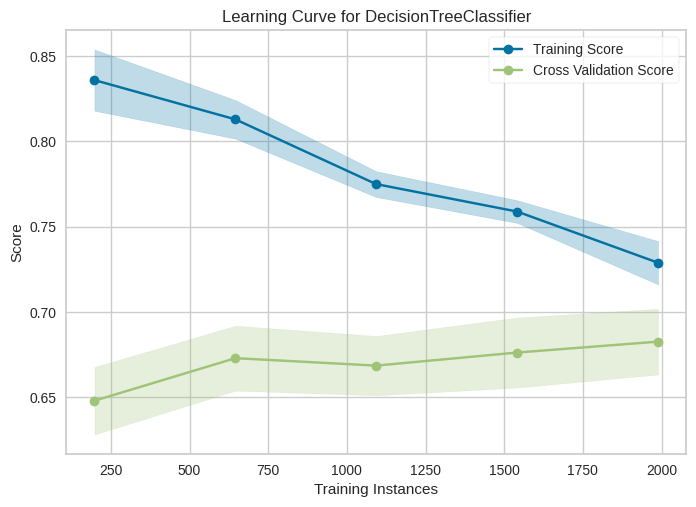

In [109]:
from yellowbrick.model_selection import LearningCurve

# Creating the learning curve
visualizer = LearningCurve(DecisionTreeClassifier(max_depth=5), n_jobs=-1, cv=10, scoring="f1_weighted")
visualizer.fit(X, y) # Saving plot in PNG format
visualizer.show(outpath="Learning_Curve.png")

The depicted learning curve exhibits a considerable amount of test variability and a low score until approximately 600 instances, beyond which the model starts to stabilize at an F1 score of approximately 0.67. The training and test scores do not appear to have converged yet, which suggests that the model could benefit from additional training data. The primary issue with this model is that it is likely overfitting, as evidenced by the higher variability in the cross-validation scores for test data compared to training data.

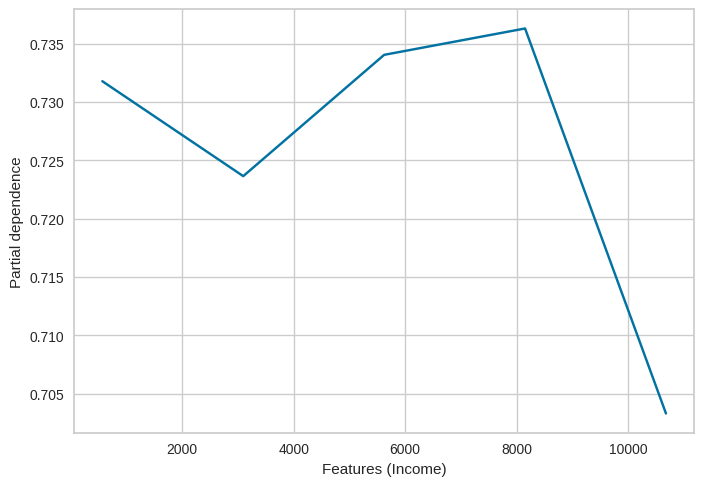

In [ ]:
# PartialDependenceDisplay
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

features, feature_names = [(3,)], [f"Features ({X.columns[i]})" for i in range(X.shape[1])]
deciles = {0: np.linspace(0, 1, num=5)}
pd_results = partial_dependence(
    dtc, X, features=0, kind="average", grid_resolution=5)
display = PartialDependenceDisplay(
    [pd_results], features=features, feature_names=feature_names,
    target_idx=0, deciles=deciles
)
display.plot()



---



#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)



#### ANS) For ML Dashboard, please refer to this [link](https://).